In [895]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [896]:
Car_df = pd.read_csv(r"F:\ERU\semester 5\Data analysis for bussiness application\project car sales\car_resale_prices.csv")
Car_df

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


In [83]:
Car_df = Car_df.drop(columns="Unnamed: 0")

In [84]:
Car_df["resale_price"] = pd.to_numeric(Car_df["resale_price"].str.strip(r"₹ Lakh"), errors = "coerce")
Car_df["mileage"] = pd.to_numeric(Car_df["mileage"].str.strip(r"kmpl"), errors = "coerce")

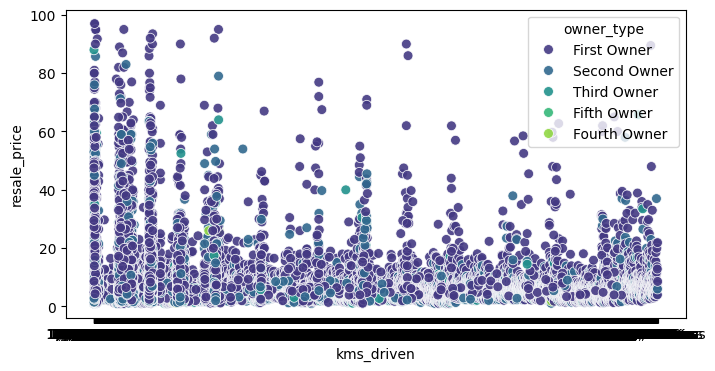

In [899]:
plt.figure(figsize= (8,4))
sns.scatterplot(
    data = Car_df,
    x = "kms_driven",
    y = "resale_price",
    hue = "owner_type",
    palette="viridis",
    s = 50,
    alpha = 0.9
)

plt.show()

In [900]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi


# we make a histogram to see the the distribution of the price , we relaize that there is right skewness

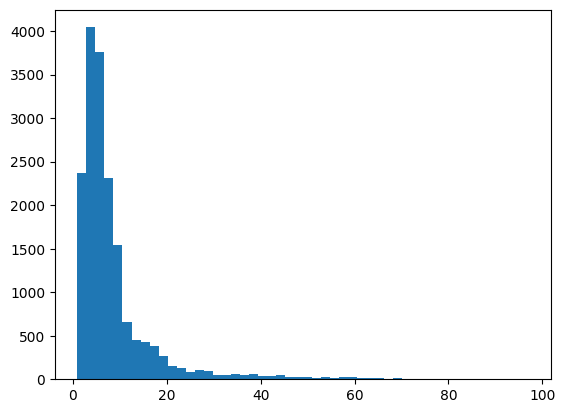

In [901]:

plt.hist(Car_df['resale_price'], bins=50)
plt.show()

### we make summary statistices for resale_price distribution and see that the mean(8.713414478270973) > median(5.96)  which indicates that there is right skew ->meaning there are a small number of very expensive cars pulling the average up 
### The difference between the Q3 (9.055) and the maximum value (97.0) is very large. This confirms the likelihood of high-value outliers

In [902]:
Car_df['resale_price'].describe()


count    17446.000000
mean         8.713414
std          9.623898
min          1.000000
25%          3.900000
50%          5.960000
75%          9.055000
max         97.000000
Name: resale_price, dtype: float64

# we try to take the log for resale_price so the graph become approximtly normal 

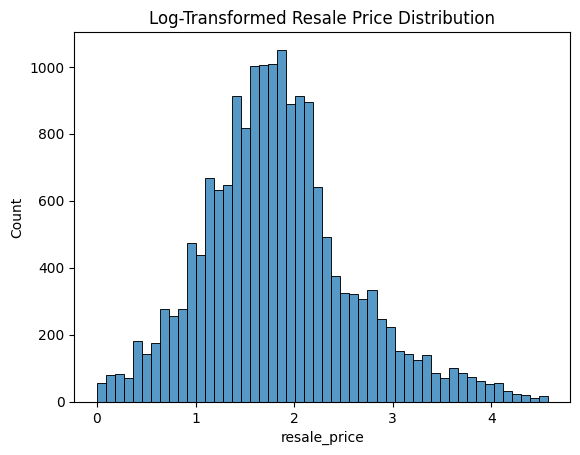

In [903]:
sns.histplot(np.log(Car_df['resale_price']), bins=50, edgecolor='black')
plt.title("Log-Transformed Resale Price Distribution")
plt.show()


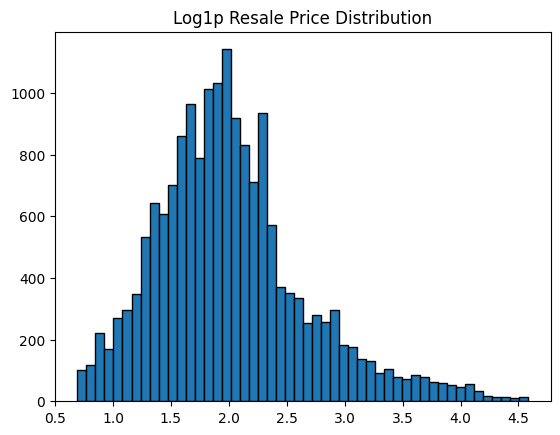

In [904]:
plt.hist(np.log1p(Car_df['resale_price']), bins=50, edgecolor='black')
plt.title("Log1p Resale Price Distribution")
plt.show()


<Axes: xlabel='resale_price'>

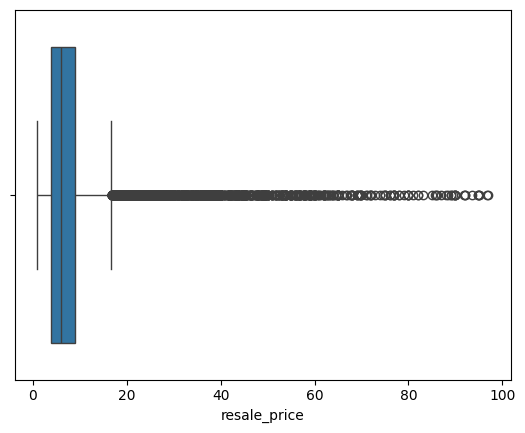

In [905]:
sns.boxplot(x=Car_df['resale_price'])

<Axes: xlabel='resale_price'>

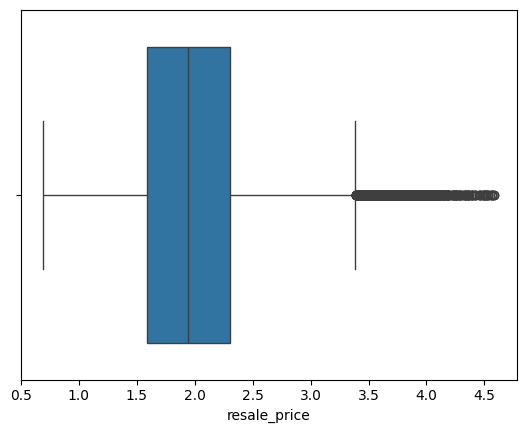

In [906]:
sns.boxplot(x=np.log1p(Car_df['resale_price']))


(0.0, 26.0)

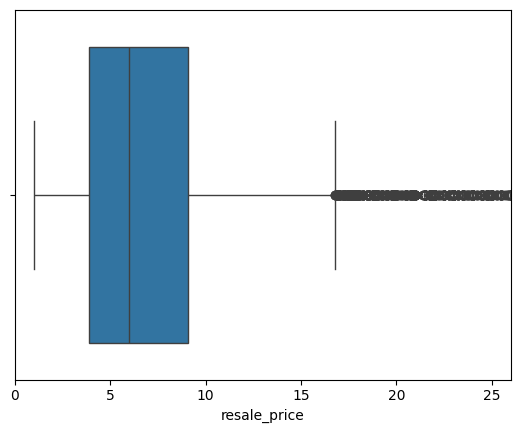

In [907]:
sns.boxplot(x=Car_df['resale_price'])
plt.xlim(0, Car_df['resale_price'].quantile(0.95))


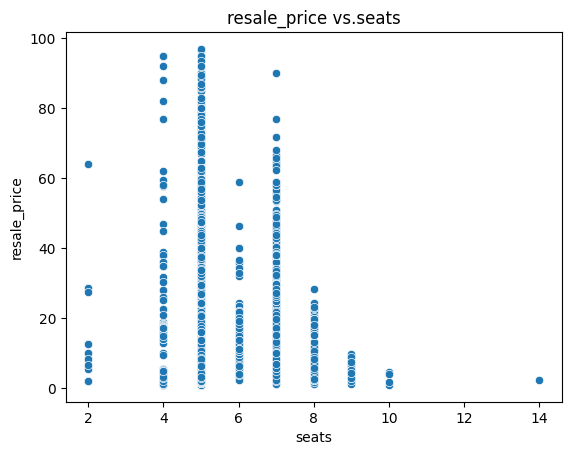

In [908]:
sns.scatterplot(x='seats', y='resale_price', data=Car_df)

plt.title('resale_price vs.seats')
plt.xlabel('seats')
plt.ylabel('resale_price')
plt.show()

<Axes: xlabel='seats', ylabel='resale_price'>

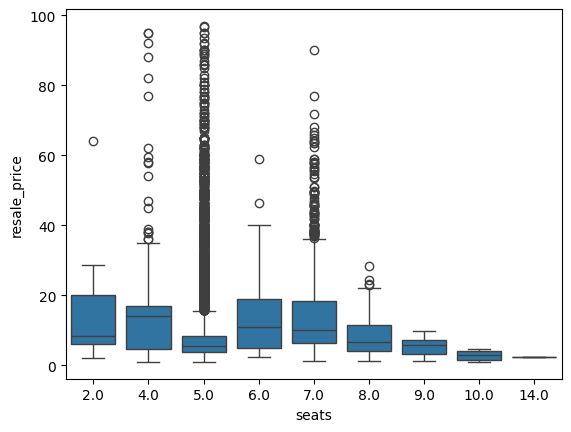

In [909]:
import seaborn as sns
sns.boxplot(x='seats', y='resale_price', data=Car_df)

<Axes: xlabel='seats', ylabel='resale_price'>

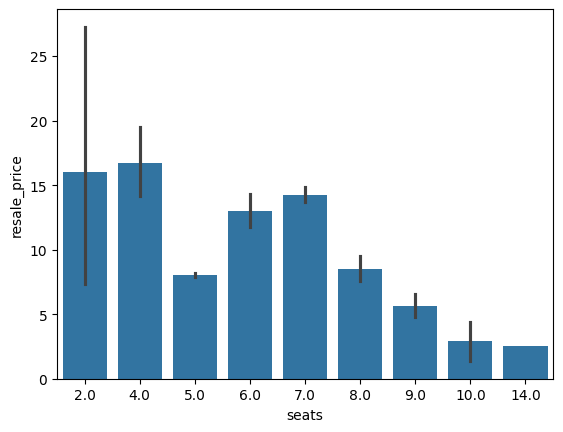

In [910]:
import seaborn as sns
sns.barplot(x='seats', y='resale_price', data=Car_df)

In [911]:
Car_df["mileage"] = Car_df["mileage"].fillna(np.mean(Car_df["mileage"]))
Car_df["resale_price"] = Car_df["resale_price"].fillna(np.mean(Car_df["resale_price"]))

In [912]:
np.corrcoef(Car_df["resale_price"], Car_df["mileage"])

array([[ 1.        , -0.28927369],
       [-0.28927369,  1.        ]])

# Preprocessing

In [913]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi


In [914]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  float64
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            17446 non-null  float64
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(3), object(11)
memory usage: 1.9+ MB


In [915]:
Missing_Summary=pd.DataFrame({
    'Number Of Nulls':Car_df.isna().sum(),
    'Nulls Precentage':round((Car_df.isna().sum()/len(Car_df))*100,2)
})
Missing_Summary

,Number Of Nulls,Nulls Precentage
full_name,0,0.00
resale_price,0,0.00
registered_year,69,0.40
engine_capacity,14,0.08
insurance,7,0.04
transmission_type,0,0.00
kms_driven,3,0.02
owner_type,45,0.26
fuel_type,0,0.00
max_power,102,0.58


# registered_year Column

In [916]:
Car_df[Car_df['registered_year'].isnull()]

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
215,2022 Audi e-tron 55 Sportback,8.713414,NaN,0 cc,Third Party insurance,Automatic,"9,900 Kms",NaN,Electric,300kWbhp,5.0,19.317058,SUV,Gurgaon
217,2020 Audi Q8 55 TFSI Quattro BSVI,89.000000,NaN,2995 cc,Third Party insurance,Automatic,"18,000 Kms",NaN,Petrol,340bhp,5.0,9.800000,SUV,Gurgaon
839,1986 Maruti 800 Std,1.400000,NaN,796 cc,Third Party insurance,Manual,"90,000 Kms",First Owner,Petrol,37bhp,4.0,16.100000,Hatchback,Chandigarh
1148,2000 Maruti Wagon R LX,8.713414,NaN,998 cc,Third Party insurance,Manual,"80,000 Kms",Second Owner,Petrol,67.1bhp,5.0,18.900000,Hatchback,Chandigarh
1436,2022 Mercedes-Benz GLB 220d 4Matic,64.000000,NaN,1998 cc,Third Party insurance,Automatic,"6,500 Kms",NaN,Diesel,187.74bhp,7.0,19.317058,SUV,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11217,1997 Maruti Zen LX,8.713414,NaN,993 cc,Third Party insurance,Manual,"70,000 Kms",Fifth Owner,Petrol,60 PS,5.0,17.300000,Hatchback,Bangalore
14005,1999 Hyundai Santro GLS II - Euro II,8.713414,NaN,NaN,Third Party insurance,Manual,"1,20,000 Kms",Third Owner,Petrol,NaN,5.0,19.317058,Hatchback,Delhi
14750,2019 Toyota Glanza G Smart Hybrid,6.350000,NaN,1197 cc,Third Party insurance,Manual,"32,000 Kms",NaN,Petrol,88.50bhp,5.0,23.870000,Hatchback,Delhi
16060,1999 Maruti 800 AC,8.713414,NaN,796 cc,Third Party insurance,Manual,"1,10,000 Kms",First Owner,Petrol,37bhp,4.0,16.100000,Hatchback,Mumbai


In [917]:
Car_df['registered_year_Imputation']=Car_df['full_name'].str[:4].astype(int)
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi,2019


In [918]:
Car_df['registered_year'][Car_df['registered_year'].isnull()] = Car_df['registered_year_Imputation'][Car_df['registered_year'].isnull()].astype(int)


C:\Users\bassem\AppData\Local\Temp\ipykernel_15000\3066897378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_df['registered_year'][Car_df['registered_year'].isnull()] = Car_df['registered_year_Imputation'][Car_df['registered_year'].isnull()].astype(int)


In [919]:
Car_df['registered_year']

0            2017
1            2018
2            2015
3            2015
4            2009
           ...   
17441    Jul 2013
17442    Jun 2016
17443    Jun 2016
17444    Jun 2019
17445    Jun 2017
Name: registered_year, Length: 17446, dtype: object

In [920]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi,2019


# engine_capacity Column

In [921]:
Car_df['engine_capacity']=Car_df['engine_capacity'].str.strip("c")
Car_df['engine_capacity']=Car_df['engine_capacity'].astype(float)
Car_df['engine_capacity']=Car_df['engine_capacity'].replace([0,'   nan'],np.nan)


In [922]:
Car_df['engine_capacity'].unique()

array(['1197 cc', '2179 cc', '1086 cc', '1047 cc', '1196 cc', '1198 cc',
       '1462 cc', '1493 cc', '1396 cc', '998 cc', '1496 cc', '1364 cc',
       '1498 cc', '2360 cc', '1248 cc', '796 cc', '1199 cc', '2494 cc',
       '1186 cc', '1968 cc', '999 cc', '1399 cc', '1956 cc', '814 cc',
       '1461 cc', '1061 cc', '995 cc', '1499 cc', '799 cc', '1120 cc',
       '1586 cc', '936 cc', '1353 cc', '1451 cc', '1497 cc', '1582 cc',
       '1368 cc', '2354 cc', '2184 cc', '1995 cc', '2499 cc', '0 cc',
       '1395 cc', '1998 cc', '1798 cc', '2143 cc', '2967 cc', '1796 cc',
       '2995 cc', '2894 cc', '1984 cc', '1298 cc', '2999 cc', '1950 cc',
       '2198 cc', '1799 cc', '1591 cc', '624 cc', '1598 cc', '1991 cc',
       '1172 cc', '2755 cc', '1373 cc', '1405 cc', '2982 cc', '1997 cc',
       '2498 cc', '1999 cc', '3198 cc', '909 cc', '1193 cc', '2609 cc',
       '2199 cc', '3498 cc', '2993 cc', '3604 cc', '2487 cc', '2998 cc',
       '2987 cc', '1996 cc', '1896 cc', '4663 cc', '2523 cc', '

<Axes: xlabel='engine_capacity', ylabel='Count'>

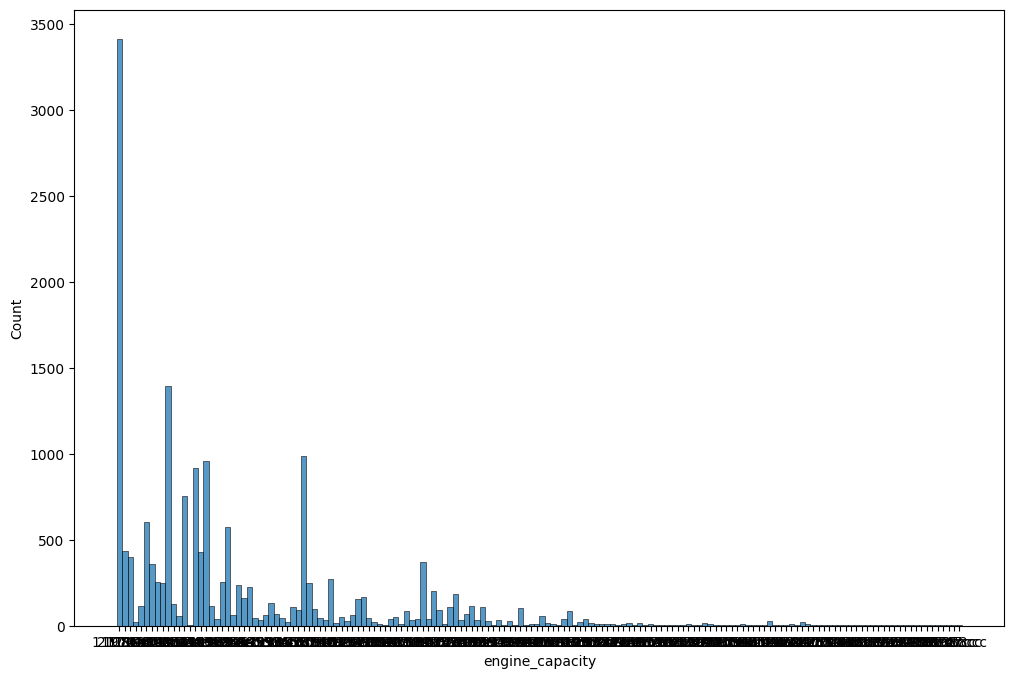

In [923]:
plt.figure(figsize= (12,8))
sns.histplot(data = Car_df,x='engine_capacity')

In [924]:
Car_df['engine_capacity'].unique()

array(['1197 cc', '2179 cc', '1086 cc', '1047 cc', '1196 cc', '1198 cc',
       '1462 cc', '1493 cc', '1396 cc', '998 cc', '1496 cc', '1364 cc',
       '1498 cc', '2360 cc', '1248 cc', '796 cc', '1199 cc', '2494 cc',
       '1186 cc', '1968 cc', '999 cc', '1399 cc', '1956 cc', '814 cc',
       '1461 cc', '1061 cc', '995 cc', '1499 cc', '799 cc', '1120 cc',
       '1586 cc', '936 cc', '1353 cc', '1451 cc', '1497 cc', '1582 cc',
       '1368 cc', '2354 cc', '2184 cc', '1995 cc', '2499 cc', '0 cc',
       '1395 cc', '1998 cc', '1798 cc', '2143 cc', '2967 cc', '1796 cc',
       '2995 cc', '2894 cc', '1984 cc', '1298 cc', '2999 cc', '1950 cc',
       '2198 cc', '1799 cc', '1591 cc', '624 cc', '1598 cc', '1991 cc',
       '1172 cc', '2755 cc', '1373 cc', '1405 cc', '2982 cc', '1997 cc',
       '2498 cc', '1999 cc', '3198 cc', '909 cc', '1193 cc', '2609 cc',
       '2199 cc', '3498 cc', '2993 cc', '3604 cc', '2487 cc', '2998 cc',
       '2987 cc', '1996 cc', '1896 cc', '4663 cc', '2523 cc', '

In [925]:
# Missing values imputation
Car_df['engine_capacity']=Car_df['engine_capacity'].fillna(Car_df['engine_capacity'].median()).astype(int)

In [926]:
Car_df['engine_capacity'].unique()

array(['1197 cc', '2179 cc', '1086 cc', '1047 cc', '1196 cc', '1198 cc',
       '1462 cc', '1493 cc', '1396 cc', '998 cc', '1496 cc', '1364 cc',
       '1498 cc', '2360 cc', '1248 cc', '796 cc', '1199 cc', '2494 cc',
       '1186 cc', '1968 cc', '999 cc', '1399 cc', '1956 cc', '814 cc',
       '1461 cc', '1061 cc', '995 cc', '1499 cc', '799 cc', '1120 cc',
       '1586 cc', '936 cc', '1353 cc', '1451 cc', '1497 cc', '1582 cc',
       '1368 cc', '2354 cc', '2184 cc', '1995 cc', '2499 cc', '0 cc',
       '1395 cc', '1998 cc', '1798 cc', '2143 cc', '2967 cc', '1796 cc',
       '2995 cc', '2894 cc', '1984 cc', '1298 cc', '2999 cc', '1950 cc',
       '2198 cc', '1799 cc', '1591 cc', '624 cc', '1598 cc', '1991 cc',
       '1172 cc', '2755 cc', '1373 cc', '1405 cc', '2982 cc', '1997 cc',
       '2498 cc', '1999 cc', '3198 cc', '909 cc', '1193 cc', '2609 cc',
       '2199 cc', '3498 cc', '2993 cc', '3604 cc', '2487 cc', '2998 cc',
       '2987 cc', '1996 cc', '1896 cc', '4663 cc', '2523 cc', '

# Regression